In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow as tf
from tensorflow import keras

In [2]:
data=pd.read_csv('TATAMOTORS.NS.csv',date_parser=True)
data.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
6477,2021-09-07,297.350006,297.799988,290.899994,294.600006,294.600006,14325904.0
6478,2021-09-08,293.500000,298.799988,291.600006,295.250000,295.250000,14920479.0
6479,2021-09-09,294.000000,303.500000,293.549988,298.950012,298.950012,34020970.0
6480,2021-09-13,299.000000,302.000000,295.500000,301.200012,301.200012,16339860.0
6481,2021-09-14,302.250000,307.200012,302.200012,306.100006,306.100006,23234649.0


In [3]:
trdata=data[data['Date']<'2021-01-01'].copy()
tsdata=data[data['Date']>='2021-01-01'].copy()

In [4]:


trdata=trdata.drop(['Date','Adj Close'],axis=1)
trdata.dropna(axis=0,how='any',inplace=True)
print(trdata.isnull().sum())



Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [5]:
s=MinMaxScaler()
trdata=s.fit_transform(trdata)
trdata

array([[0.10474505, 0.10296286, 0.10674933, 0.10488202, 0.        ],
       [0.10474505, 0.10296286, 0.10674933, 0.10488202, 0.        ],
       [0.10474505, 0.10296286, 0.10674933, 0.10488202, 0.        ],
       ...,
       [0.30009534, 0.29753862, 0.29381225, 0.2933923 , 0.33097816],
       [0.2919473 , 0.29240626, 0.29260292, 0.29458507, 0.17902705],
       [0.29491795, 0.29594002, 0.29674913, 0.2940739 , 0.22730211]])

In [6]:
Xtrain=[]
Ytrain=[]

for i in range(90,trdata.shape[0]):
    Xtrain.append(trdata[i-90:i])
    Ytrain.append(trdata[i,0])

In [7]:
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)

In [8]:
Xtrain.shape,Ytrain.shape


((6205, 90, 5), (6205,))

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM , Dropout
from keras import optimizers
optimizer = tf.keras.optimizers.Adam(clipvalue=0.5)
from sklearn.metrics import mean_squared_error

In [10]:
reg=Sequential()
reg.add(LSTM(units=60,activation='relu',return_sequences= True, input_shape=(Xtrain.shape[1],5)))
reg.add(Dropout(0.2))
reg.add(LSTM(units=80,activation='relu',return_sequences= True))
reg.add(Dropout(0.2))
reg.add(LSTM(units=100,activation='relu',return_sequences= True))
reg.add(Dropout(0.2))
reg.add(LSTM(units=120,activation='relu',return_sequences= True))
reg.add(Dropout(0.2))
reg.add(LSTM(units=140,activation='relu',return_sequences= True))
reg.add(Dropout(0.2))
reg.add(LSTM(units=160,activation='relu'))
reg.add(Dropout(0.2))
reg.add(Dense(units=1))

In [11]:
reg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 90, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 90, 80)            45120     
_________________________________________________________________
dropout_1 (Dropout)          (None, 90, 80)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 90, 100)           72400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 90, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 90, 120)           1

In [12]:
reg.compile(optimizer=optimizer, loss='mean_squared_error',metrics=['mse'])

In [13]:
reg.fit(Xtrain,Ytrain,epochs=10,batch_size=36)

Epoch 1/10
173/173 [==============================] - 58s 311ms/step - loss: 0.0139 - mse: 0.0139
Epoch 2/10
173/173 [==============================] - 58s 337ms/step - loss: 0.0026 - mse: 0.0026
Epoch 3/10
173/173 [==============================] - 58s 334ms/step - loss: 0.0022 - mse: 0.0022
Epoch 4/10
173/173 [==============================] - 57s 332ms/step - loss: 0.0022 - mse: 0.0022
Epoch 5/10
173/173 [==============================] - 58s 338ms/step - loss: 0.0020 - mse: 0.0020
Epoch 6/10
173/173 [==============================] - 58s 337ms/step - loss: 0.0018 - mse: 0.0018
Epoch 7/10
173/173 [==============================] - 59s 338ms/step - loss: 0.0016 - mse: 0.0016
Epoch 8/10
173/173 [==============================] - 57s 329ms/step - loss: 0.0014 - mse: 0.0014
Epoch 9/10
173/173 [==============================] - 58s 333ms/step - loss: 0.0013 - mse: 0.0013
Epoch 10/10
173/173 [==============================] - 58s 334ms/step - loss: 0.0015 - mse: 0.0015


In [14]:
tsdata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
6309,2021-01-01,184.949997,187.000000,184.500000,186.500000,186.500000,27334421.0
6310,2021-01-04,191.800003,193.000000,188.750000,191.300003,191.300003,63980597.0
6311,2021-01-05,187.100006,193.899994,185.050003,193.199997,193.199997,75752593.0
6312,2021-01-06,194.449997,197.600006,190.649994,195.399994,195.399994,75621947.0
6313,2021-01-07,197.000000,200.350006,195.100006,196.750000,196.750000,66024848.0


In [15]:
t=tsdata.tail(90)

In [16]:
ts=t.append(tsdata,ignore_index=True)
ts=ts.drop(['Adj Close','Date'],axis=1)
ts

,Open,High,Low,Close,Volume
0,291.500000,302.000000,290.299988,301.250000,45032502.0
1,303.000000,305.950012,300.500000,302.750000,41591323.0
2,304.500000,315.700012,304.000000,314.850006,53260388.0
3,309.549988,320.750000,308.100006,315.549988,58472304.0
4,318.250000,334.750000,316.250000,326.000000,111584920.0
...,...,...,...,...,...
258,297.350006,297.799988,290.899994,294.600006,14325904.0
259,293.500000,298.799988,291.600006,295.250000,14920479.0
260,294.000000,303.500000,293.549988,298.950012,34020970.0
261,299.000000,302.000000,295.500000,301.200012,16339860.0


In [17]:
inp=s.transform(ts)

In [18]:
Xtest=[]
Ytest=[]
for i in range(90,inp.shape[0]):
    Xtest.append(inp[i-90:i])
    Ytest.append(inp[i,0])

In [19]:
Xtest = np.array(Xtest)
Ytest = np.array(Ytest)
Xtest.shape

(173, 90, 5)

In [20]:
ypred=reg.predict(Xtest)

In [21]:
ypred

array([[0.45979878],
       [0.46141055],
       [0.46114692],
       [0.45804688],
       [0.4515647 ],
       [0.44149026],
       [0.42846557],
       [0.41340092],
       [0.39733943],
       [0.38145313],
       [0.3670543 ],
       [0.3553364 ],
       [0.3471038 ],
       [0.3427374 ],
       [0.34186637],
       [0.34400067],
       [0.348371  ],
       [0.35434082],
       [0.36146548],
       [0.3693243 ],
       [0.37746072],
       [0.38538447],
       [0.39272568],
       [0.3994243 ],
       [0.4058039 ],
       [0.41237888],
       [0.41965565],
       [0.4279341 ],
       [0.43720552],
       [0.44721356],
       [0.45750883],
       [0.46756473],
       [0.47690493],
       [0.48517367],
       [0.4921408 ],
       [0.49758014],
       [0.50129735],
       [0.50316924],
       [0.5033256 ],
       [0.5020233 ],
       [0.49975207],
       [0.4970961 ],
       [0.4945582 ],
       [0.4926388 ],
       [0.49171534],
       [0.49184075],
       [0.49278507],
       [0.494

In [22]:
s.scale_

array([1.69751181e-03, 1.68273922e-03, 1.72757907e-03, 1.70396498e-03,
       4.64087277e-09])

In [23]:
scale=1/1.69751181e-03
scale

589.0975215070815

In [24]:
ypred=ypred*scale
Ytest=Ytest*scale

Text(0, 0.5, 'P')

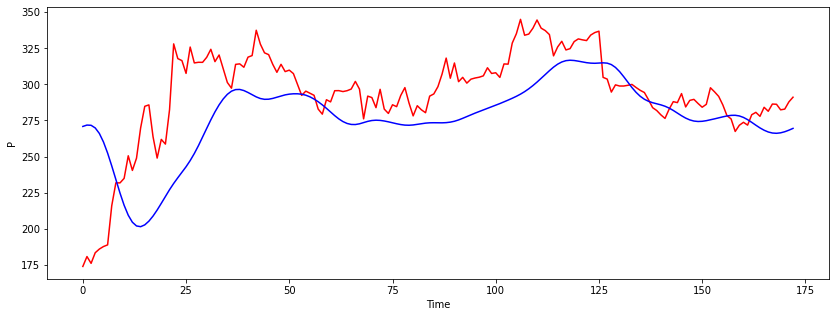

In [25]:

#Visualization 
plt.figure(figsize=(14,5))
plt.plot(Ytest,color ='red',label="Real stock Price")
plt.plot(ypred,color='blue',label="Predicted stock Price")
plt.xlabel('Time')
plt.ylabel('P')